<a href="https://colab.research.google.com/github/Lemito66/Maestria/blob/master/nlp/NLP_Tokenization_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#@title Nombre del estudiante
Estudiante = "" #@param {type:"string"}
Código = "" #@param {type:"string"}

# NLP Procesamiento Natural de Lenguaje






*   Empecemos desde donde quedamos en el ultimo ejercicio, importemos el archivo de Excel que exportaste con un listado de Tweets.
* Asegurate que la columna con los tweets se llama **Tweet_Text**



In [34]:
#!pip install wordcloud
import re
import unicodedata
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

import pandas as pd
from collections import Counter
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elogrono\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
df = pd.read_excel('tweets_ecuador.xlsx')
df.head()

Unnamed: 0                   id  \
0           0  1645860313156275968   
1           1  1645860275524980992   
2           2  1645860264003378944   
3           3  1645860236190798080   
4           4  1645860224585158912   

                                                text  created_at  source  \
0  CONFIRMAMOS A ECUADOR..HASTA EL MOMENTO NADIE ...         NaN     NaN   
1  @JMilei mis mejores deseos y te sigo como arge...         NaN     NaN   
2  No te pierdas la fase final de la #CONMEBOL Su...         NaN     NaN   
3  @LaRed_Ecuador Salí ganador de una entrada par...         NaN     NaN   
4  Animales, criminales que siguen aterrizando a ...         NaN     NaN   

   retweets  replies  likes  quote_count  
0       NaN      NaN    NaN          NaN  
1       NaN      NaN    NaN          NaN  
2       NaN      NaN    NaN          NaN  
3       NaN      NaN    NaN          NaN  
4       NaN      NaN    NaN          NaN

-----

In [36]:
df.shape

(10000, 9)

**Pasemos todo a minusculas**



In [37]:
df['Tweet_Text'] = df['text']
df['Tweet_Text'] = df['Tweet_Text'].str.lower()

In [38]:
df.head()

Unnamed: 0                   id  \
0           0  1645860313156275968   
1           1  1645860275524980992   
2           2  1645860264003378944   
3           3  1645860236190798080   
4           4  1645860224585158912   

                                                text  created_at  source  \
0  CONFIRMAMOS A ECUADOR..HASTA EL MOMENTO NADIE ...         NaN     NaN   
1  @JMilei mis mejores deseos y te sigo como arge...         NaN     NaN   
2  No te pierdas la fase final de la #CONMEBOL Su...         NaN     NaN   
3  @LaRed_Ecuador Salí ganador de una entrada par...         NaN     NaN   
4  Animales, criminales que siguen aterrizando a ...         NaN     NaN   

   retweets  replies  likes  quote_count  \
0       NaN      NaN    NaN          NaN   
1       NaN      NaN    NaN          NaN   
2       NaN      NaN    NaN          NaN   
3       NaN      NaN    NaN          NaN   
4       NaN      NaN    NaN          NaN   

                                          Tweet_Text  
0  confirmamos a ecuador..hasta el momento nadie ...  
1  @jmilei mis mejores deseos y te sigo como arge...  
2  no te pierdas la fase final de la #conmebol su...  
3  @lared_ecuador salí ganador de una entrada par...  
4  animales, criminales que siguen aterrizando a ...

----


# **Tokenizar**
En NLP el proceso de convertir las palabras o párrafos en inputs para la computadora se llama tokenización. Se puede pensar al token como la unidad para procesamiento semántico, es decir palabras.

## Tokenización con NLTK
El kit de herramientas de lenguaje natural, o más comúnmente NLTK, es un conjunto de bibliotecas y programas para el procesamiento del lenguaje natural (PLN) simbólico y estadísticos para el lenguaje de programación Python. NLTK incluye demostraciones gráficas y datos de muestra.

*Bird, Steven, Edward Loper and Ewan Klein (2009), Natural Language Processing with Python. O’Reilly Media Inc.*
[nltk.org](https://nltk.org/)

**NLTK tiene librerias que permiten tokenizar, veamos la diferencia entre ellas**

TreeBankTokenizer es perfecto en partir el texto, sin embargo no es bueno con Tweets, quita información como hashtags y menciones.


NLTK proporciona una amplia variedad de herramientas y recursos para el procesamiento de texto en lenguaje natural, incluyendo tokenización, etiquetado POS, análisis de sentimientos, extracción de entidades, análisis de dependencias, entre otras. También ofrece una gran cantidad de corpus de texto, como el corpus de noticias Reuters, el corpus de opinión de películas, entre otros, que se pueden utilizar para entrenar modelos de procesamiento de lenguaje natural.

Además, NLTK es fácil de usar y cuenta con una documentación detallada y ejemplos de código que ayudan a los usuarios a entender cómo utilizar las diferentes herramientas y recursos de la librería.

En resumen, NLTK es una librería de procesamiento del lenguaje natural muy útil y popular que ofrece una amplia variedad de herramientas y recursos para el procesamiento de texto en lenguaje natural en Python.

In [39]:
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TreebankWordTokenizer

texto = "¿Cuánto tiempo pasó desde que comí una manzana?"
tweet = ' #Oscar a Mejor Película Internacional; 😩😔😁 un filme ecuatoriano figura en la lista » https://t.co/cb5p6eX3DZ https://t.co/kQ0nVAbyOn'

print(WordPunctTokenizer().tokenize(texto))
print(WordPunctTokenizer().tokenize(tweet))
print(TreebankWordTokenizer().tokenize(tweet))
print(WordPunctTokenizer().tokenize(tweet))


['¿', 'Cuánto', 'tiempo', 'pasó', 'desde', 'que', 'comí', 'una', 'manzana', '?']
['#', 'Oscar', 'a', 'Mejor', 'Película', 'Internacional', ';', '😩😔😁', 'un', 'filme', 'ecuatoriano', 'figura', 'en', 'la', 'lista', '»', 'https', '://', 't', '.', 'co', '/', 'cb5p6eX3DZ', 'https', '://', 't', '.', 'co', '/', 'kQ0nVAbyOn']
['#', 'Oscar', 'a', 'Mejor', 'Película', 'Internacional', ';', '😩😔😁', 'un', 'filme', 'ecuatoriano', 'figura', 'en', 'la', 'lista', '»', 'https', ':', '//t.co/cb5p6eX3DZ', 'https', ':', '//t.co/kQ0nVAbyOn']
['#', 'Oscar', 'a', 'Mejor', 'Película', 'Internacional', ';', '😩😔😁', 'un', 'filme', 'ecuatoriano', 'figura', 'en', 'la', 'lista', '»', 'https', '://', 't', '.', 'co', '/', 'cb5p6eX3DZ', 'https', '://', 't', '.', 'co', '/', 'kQ0nVAbyOn']


## NLTK Tweet Tokenizer

Por suerte NLTK ya tiene una libreria que soluciona este problema y tokeniza manteniendo emoticonos, menciones y hashtags

In [40]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

tweet = ' #Oscar a Mejor Película Internacional; 😩😔😁 un filme ecuatoriano figura en la lista » https://t.co/cb5p6eX3DZ https://t.co/kQ0nVAbyOn'
tweet_tokenizer.tokenize(tweet)

['#Oscar',
 'a',
 'Mejor',
 'Película',
 'Internacional',
 ';',
 '😩',
 '😔',
 '😁',
 'un',
 'filme',
 'ecuatoriano',
 'figura',
 'en',
 'la',
 'lista',
 '»',
 'https://t.co/cb5p6eX3DZ',
 'https://t.co/kQ0nVAbyOn']

# Creamos una lista de palabras y sus frecuencias

In [41]:
import nltk
from collections import Counter
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

# Una lista para todas las palabras
palabras_todas = []

# Creamos un contador de frecuencias
count_all = Counter()

for tweet in df["Tweet_Text"]:
  # Crear una lista de todos los terminos con NLTK
  terms_all = tweet_tokenizer.tokenize(tweet)
  # Actualizar el contador
  count_all.update(terms_all)
  # Aumentar al listado de todas las palabras
  palabras_todas.extend(terms_all)

# Las primeras 10 palabras más comunes
print("Cantidad de terminos unicos: ", len(count_all))
print("Total de terminos (incluye repetidos): ", len(palabras_todas))
count_all.most_common(20)

KeyboardInterrupt: 

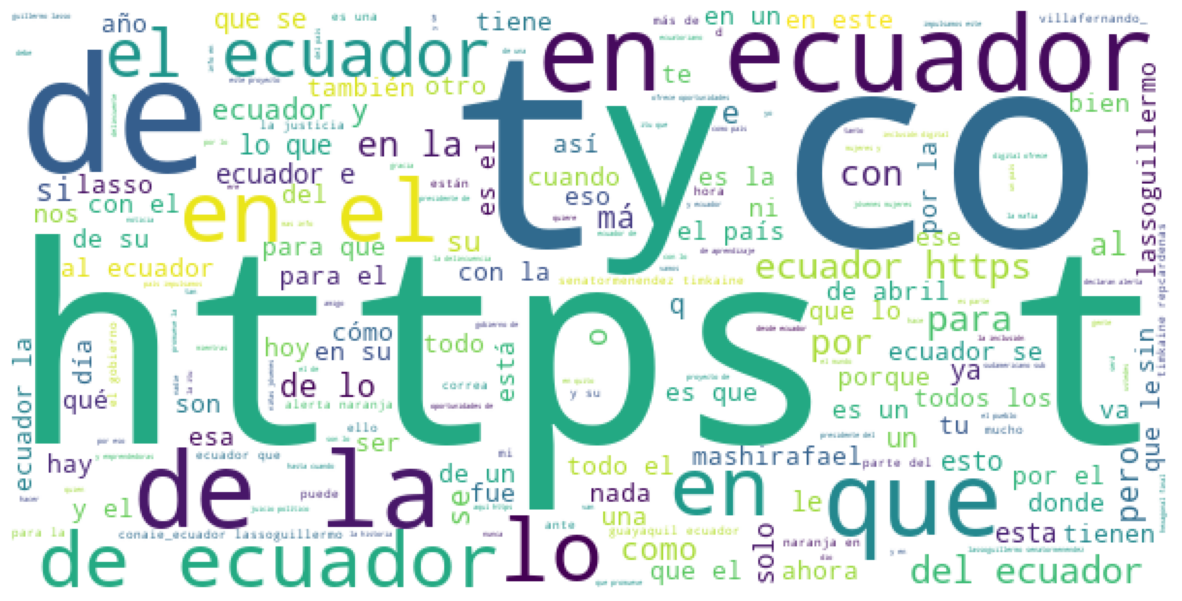

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

unique_string=(" ").join(palabras_todas)
wordcloud = WordCloud(width = 600, height = 300, background_color="white",).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("wordcloud_polluted"+".png", bbox_inches='tight')
plt.show()
plt.close()

## Quitar StopWords o Palabras Vacias

Si vemos en el ejercicio anterior, hay muchas palabras con frecuencias altas que no nos dicen nada, estas son palabras vacias o Stopwords.

Las palabras vacías son aquellas palabras en lenguaje natural que tienen muy poco significado, como «es», «una», «el», etc.

Las palabras vacías a menudo se eliminan del texto antes de entrenar los modelos de aprendizaje profundo y de Machine Learning, ya que las palabras vacías ocurren en abundancia, por lo que brindan poca o ninguna información única que se pueda usar para la clasificación o agrupación.

[Palabras Vacias Wikipedia](https://es.wikipedia.org/wiki/Palabra_vac%C3%ADa)

NLTK tiene un listado de palabras vacias en ingles y español, pero tambien podemos añadir las nuestras.

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

otros_a_quitar = ['»', ';', ',', '.','!','?','¿',',','rt', 'via' ]

punctuation = list(string.punctuation)
stop = stopwords.words('spanish') + stopwords.words('english') + punctuation + otros_a_quitar

print(stop)
print('Total de stop words: ', len(stop))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elogrono\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [ ]:
# Listas de frecuencias
count_stop = Counter()
count_hash = Counter()
count_mentions = Counter()
count_terms_only = Counter()

# Listas de palabras
lista_todas = []
lista_hash = []
lista_mentions = []
lista_terms_only = []

for tweet in df["Tweet_Text"]:

  # Crear una lista de todos los terminos que no están en el stop
  terms_stop = [term for term in tweet_tokenizer.tokenize(tweet) if term not in stop]
  # Actualizar el contador
  count_stop.update(terms_stop)
  # Actualizar la lista
  lista_todas.extend(terms_stop)

  # Contar hashtags
  terms_hash = [term for term in tweet_tokenizer.tokenize(tweet) if term.startswith('#')]
  # Actualizar el contador
  count_hash.update(terms_hash)
  # Actualizar la lista
  lista_hash.extend(terms_hash)

  # Contar menciones
  terms_mentions = [term for term in tweet_tokenizer.tokenize(tweet) if term.startswith('@')]
  # Actualizar el contador
  count_mentions.update(terms_mentions)
  # Actualizar la lista
  lista_mentions.extend(terms_mentions)

  # Contar terms sin hash ni menciones
  terms_only = [term for term in tweet_tokenizer.tokenize(tweet) if term not in stop and not term.startswith(('#', '@', 'http'))]
  # Actualizar el contador
  count_terms_only.update(terms_only)
  # Actualizar la lista
  lista_terms_only.extend(terms_only)

print(count_stop.most_common(20))
print(count_hash.most_common(20))
print(count_terms_only.most_common(20))
print(count_mentions.most_common(20))

[('ecuador', 7353), ('#ecuador', 1899), ('...', 932), ('país', 889), ('🇪🇨', 873), ('️', 858), ('si', 804), ('@lassoguillermo', 801), ('q', 536), ('..', 498), ('lasso', 484), ('presidente', 444), ('¡', 441), ('solo', 406), ('@mashirafael', 369), ('gobierno', 338), ('ser', 337), ('aquí', 321), ('años', 307), ('hoy', 299)]
[('#ecuador', 1899), ('#guayaquil', 201), ('#quito', 195), ('#corruptos', 142), ('#chile', 134), ('#argentina', 104), ('#venezuela', 104), ('#colombia', 102), ('#americasgirlscancode', 96), ('#cuenca', 95), ('#mexico', 94), ('#', 85), ('#delincuentes', 80), ('#crimenorganizado', 78), ('#reunion', 77), ('#parejasswinger', 77), ('#sábado', 77), ('#abril2023', 77), ('#prohibidoolvidar', 76), ('#gobierno', 75)]
[('ecuador', 7353), ('...', 932), ('país', 889), ('🇪🇨', 873), ('️', 858), ('si', 804), ('q', 536), ('..', 498), ('lasso', 484), ('presidente', 444), ('¡', 441), ('solo', 406), ('gobierno', 338), ('ser', 337), ('aquí', 321), ('años', 307), ('hoy', 299), ('vs', 288), (

# WordCloud

Una nube de palabras o nube de etiquetas es una representación visual de las palabras que conforman un texto, en donde el tamaño es mayor para las palabras que aparecen con más frecuencia.

Uno de sus usos principales es la visualización de las etiquetas de un sitio web, de modo que los temas más frecuentes en el sitio se muestren con mayor prominencia.

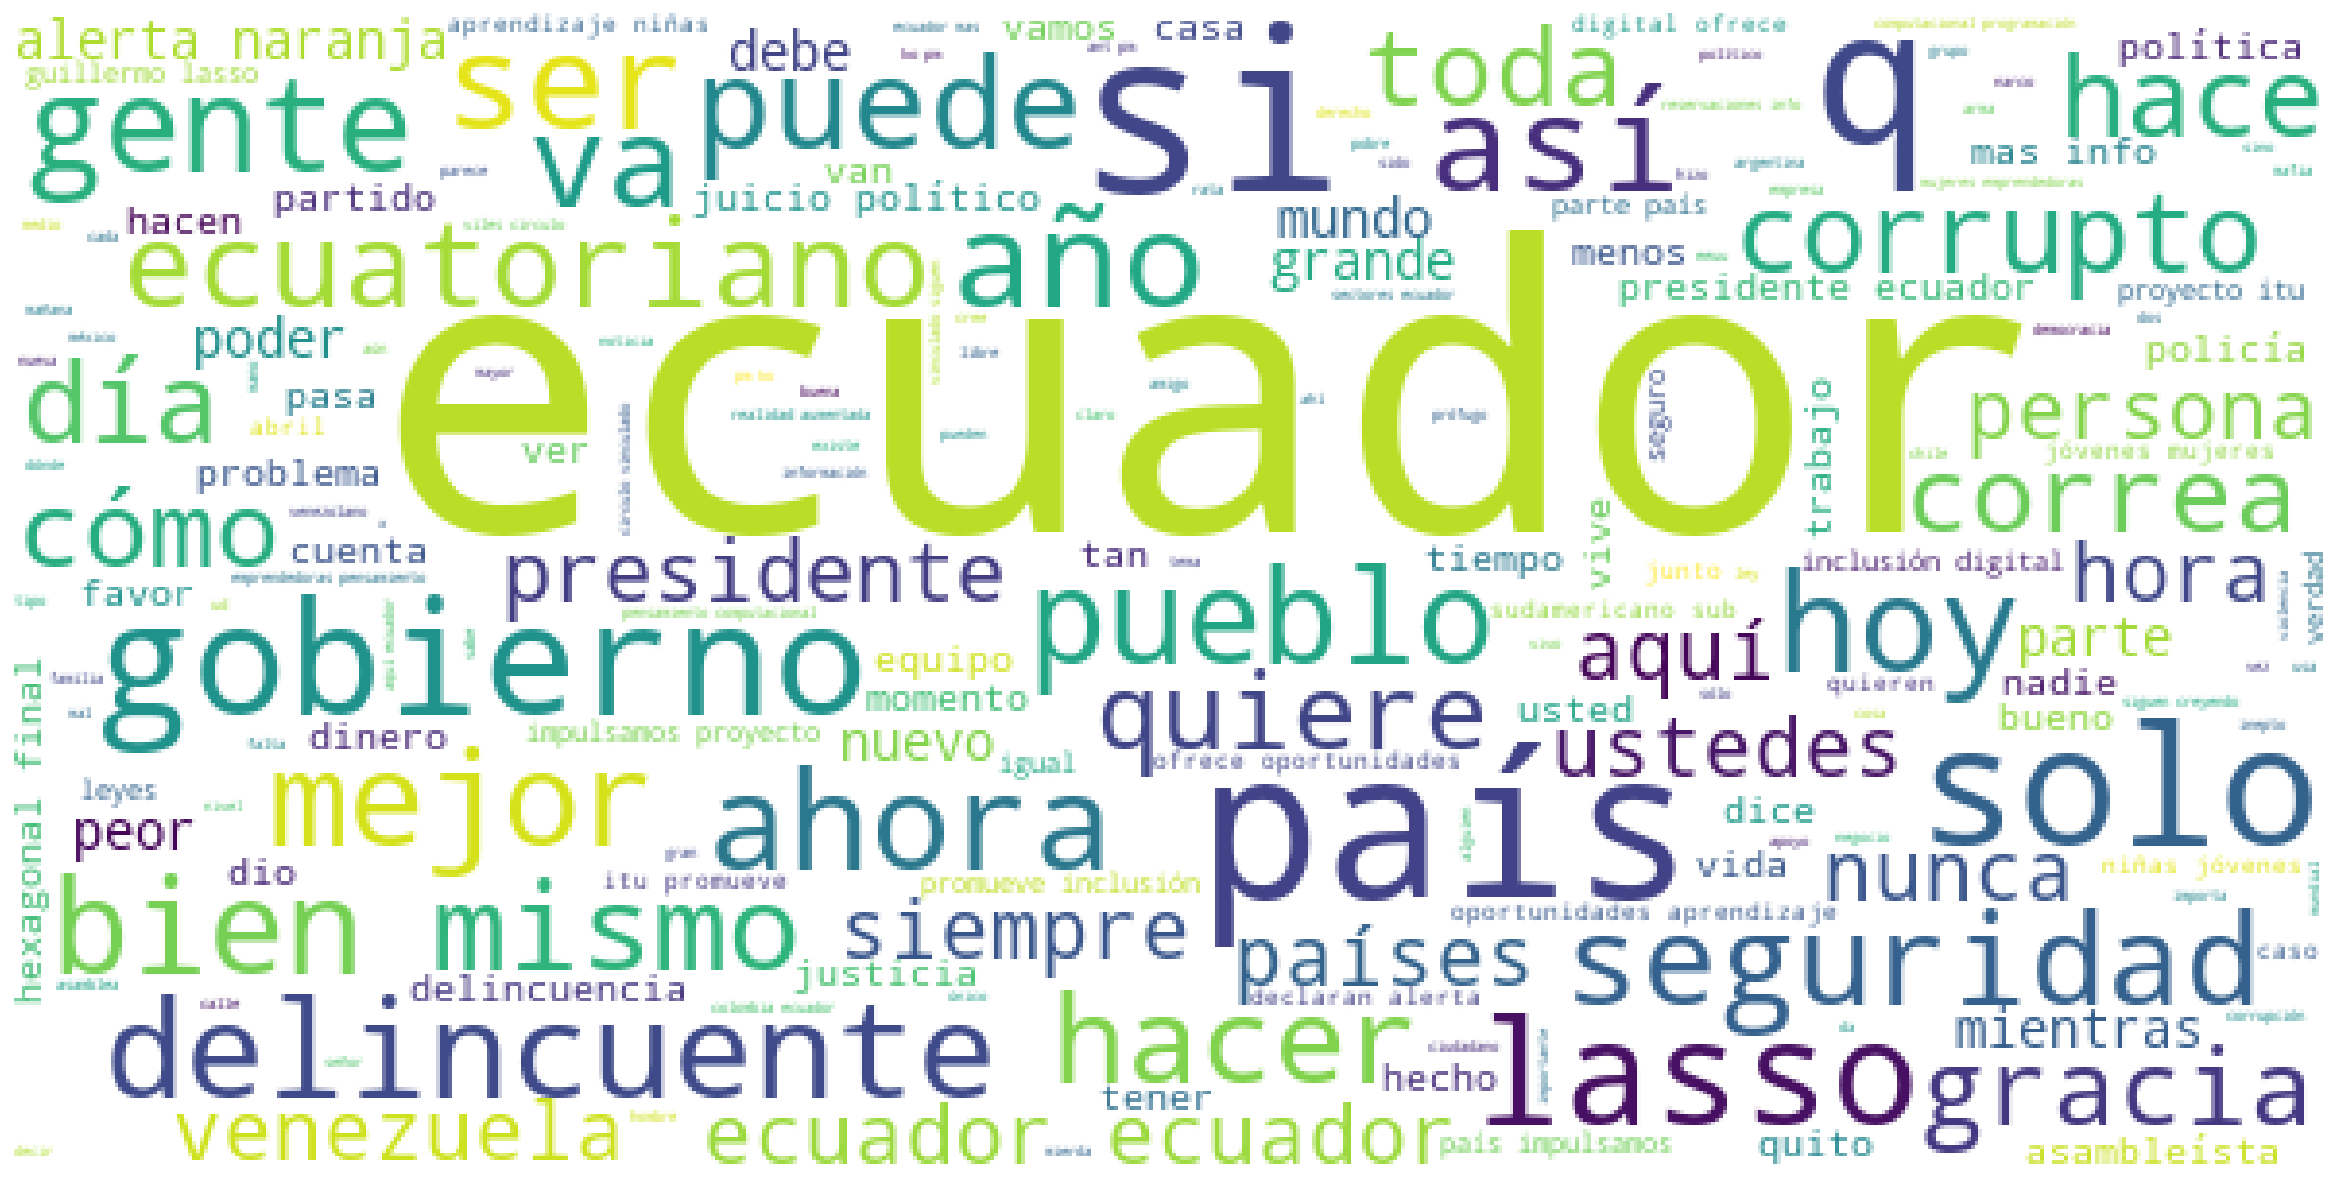

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

unique_string=(" ").join(lista_terms_only)
wordcloud = WordCloud(width = 600, height = 300, background_color="white",).generate(unique_string)
plt.figure(figsize=(30,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("wordcloud"+".png", bbox_inches='tight')
plt.show()
plt.close()

# WordCloud con Mascara

Python nos permite componer un wordcloud usando una imagen como mascara, asegurate de buscar una foto con fondo blanco.
**No olvides subir la imagen spiderman_mask.jpg junto al cuaderno.**

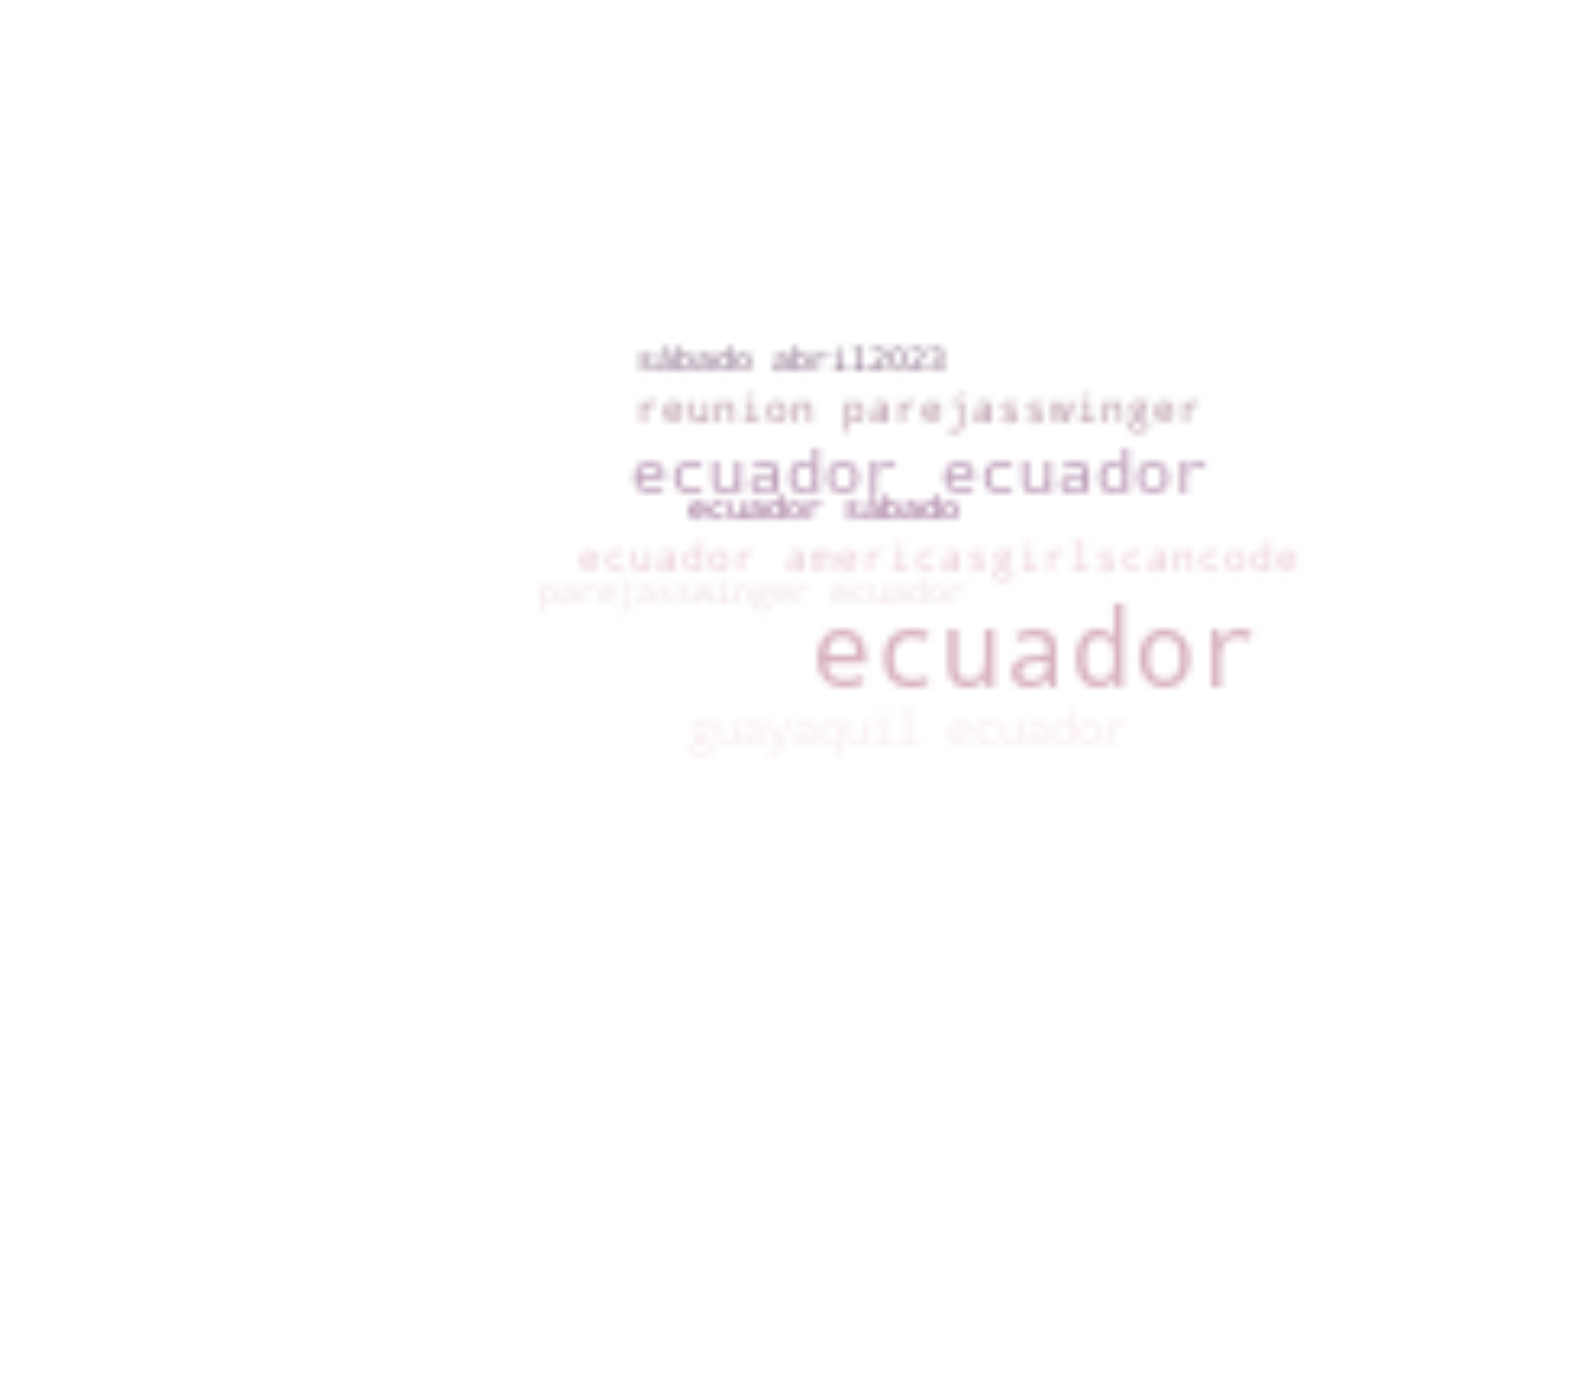

In [ ]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import requests
import matplotlib.pyplot as plt

#unique_string=(" ").join(lista_terms_only)
unique_string=(" ").join(lista_hash)

# Utilizar una imagen del internet como mascara
#url_imagen_original = "https://i.pinimg.com/originals/80/7b/29/807b29f756cc47621f92b3581e263272.jpg"
#mask = np.array(Image.open( requests.get(urlimagen_original, stream=True).raw ))

# Abrir una imagen de mascara local
mask = np.array(Image.open("bandera.jfif") )

wordcloud_por = WordCloud(background_color="white", max_words=5000, mask=mask).generate(unique_string)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,20])
plt.imshow(wordcloud_por.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")


# store to file
plt.savefig("spiderman_wordcloud.png", format="png")
plt.show()

In [ ]:
print(count_hash)

Counter({'#ecuador': 1899, '#guayaquil': 201, '#quito': 195, '#corruptos': 142, '#chile': 134, '#argentina': 104, '#venezuela': 104, '#colombia': 102, '#americasgirlscancode': 96, '#cuenca': 95, '#mexico': 94, '#': 85, '#delincuentes': 80, '#crimenorganizado': 78, '#reunion': 77, '#parejasswinger': 77, '#sábado': 77, '#abril2023': 77, '#prohibidoolvidar': 76, '#gobierno': 75, '#tiktok': 73, '#correismo': 73, '#china': 73, '#sicarios': 72, '#bolivia': 72, '#compañeritos': 71, '#socialistas': 71, '#correistas': 71, '#mafia': 71, '#narco': 71, '#movimiento': 71, '#carteles': 71, '#perú': 70, '#uio': 70, '#españa': 67, '#esteesmipaís': 67, '#paraguay': 65, '#usa': 62, '#cuba': 59, '#onlyfans': 57, '#europa': 57, '#rusia': 56, '#comparte': 54, '#gye': 53, '#iran': 53, '#ucrania': 53, '#ww3': 53, '#hipnosis': 52, '#dejardfumar': 52, '#suscríbete': 52, '#otan': 52, '#israel': 52, '#warzone': 52, '#atención': 49, '#pensamiento': 47, '#sudamericanosub17': 47, '#frases': 46, '#quotes': 46, '#fra

# Exportar listas a Excel para análisis posterior

**Creamos una función para exportar la lista de frecuencias de palabras a Excel**

In [ ]:
def counter_to_excel(counter, filename):
  palabras = []
  for i in counter.items():
    palabras.append([i[0],i[1]])
  pd.DataFrame(palabras).to_excel(filename, header=False, index=False)
  return None

Extraer la data a excel para procesarla


In [ ]:
counter_to_excel(count_stop, "count_stop.xlsx")
counter_to_excel(count_hash, "count_hash.xlsx")
counter_to_excel(count_terms_only, "count_terms_only.xlsx")
counter_to_excel(count_mentions, "count_mentions.xlsx")

pd.DataFrame(lista_todas).to_excel('lista_todas.xlsx', header=False, index=False)
pd.DataFrame(lista_hash).to_excel('lista_hash.xlsx', header=False, index=False)
pd.DataFrame(lista_mentions).to_excel('lista_mentions.xlsx', header=False, index=False)
pd.DataFrame(lista_terms_only).to_excel('lista_terms_only.xlsx', header=False, index=False)

# Análisis de sentimiento
![alt text](https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/0cc39c70021d21fc0d2fd7a986ccd242bef86c29/6-Figure1-1.png)

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(30,1)})

def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

def visualise_sentiments_from_sentence(sentence):
  visualise_sentiments({
      "Sentence":["SENTENCE"] + sentence.split(),
      "Sentiment":[sid.polarity_scores(sentence)["compound"]] + [sid.polarity_scores(word)["compound"] for word in sentence.split()]
  })

## NLTK Vader

(Valence Aware Dictionary and sEntiment Reasoner) es un módulo de análisis de sentimientos en el procesamiento del lenguaje natural (NLP) desarrollado como parte de la librería NLTK (Natural Language Toolkit) en Python.

El módulo de análisis de sentimientos de NLTK Vader utiliza un diccionario de palabras que ha sido previamente etiquetado según su polaridad (positiva, negativa o neutra) y su intensidad. Utilizando esta información, NLTK Vader asigna una puntuación de sentimiento a un texto de entrada en función de la cantidad de palabras positivas, negativas y neutras en el texto, así como de su intensidad.

NLTK Vader es útil en la clasificación automática de textos según su polaridad, y es especialmente adecuado para su uso en textos cortos, como comentarios de redes sociales o reseñas de productos. Además, NLTK Vader es fácil de usar y puede proporcionar una puntuación de sentimiento de texto en cuestión de segundos.

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\elogrono\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
sentence = "I like programing in Python"

In [ ]:
sid.polarity_scores(sentence)

{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.3612}

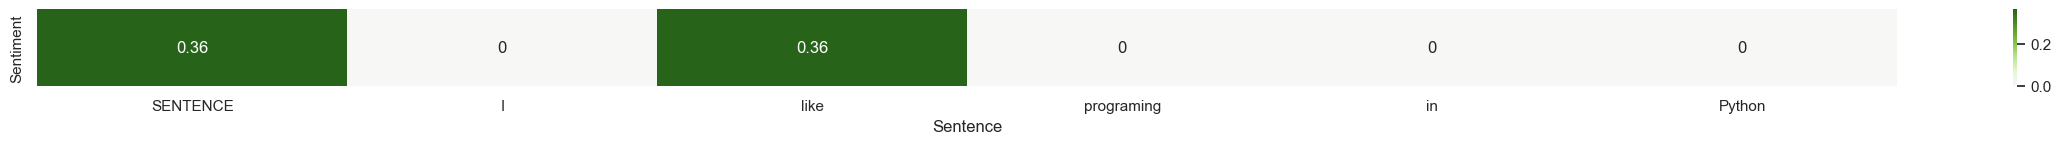

In [ ]:
visualise_sentiments_from_sentence(sentence)

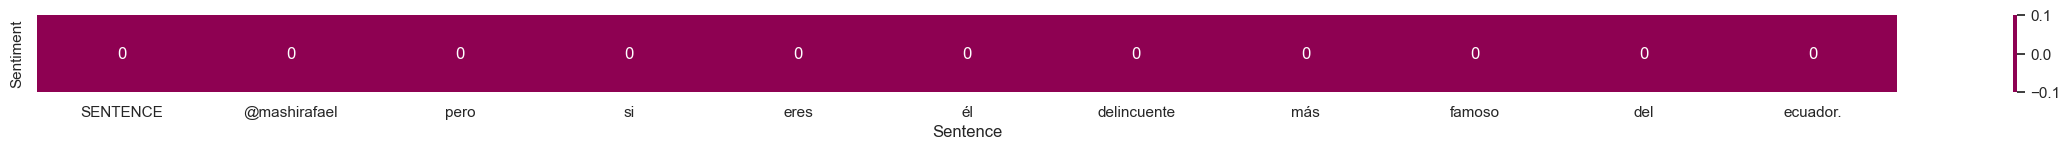

In [ ]:
# Que pasa si le pasamos texto en español
visualise_sentiments_from_sentence(tweet)

# Traducir
Casi todos los módelos de Analisis de sentimiento funcionan en Ingles, una solución es traducir.

In [ ]:
!pip install -q spanish-sentiment-analysis
!pip install -q googletrans==3.1.0a0

^C


In [ ]:
from googletrans import Translator
from time import sleep

def traducir(text, dest='en', **kwargs):
    translator = Translator()
    result = None
    while result == None:
        try:
            result = translator.translate(text,**kwargs)
        except Exception as e:
            print(e)
            translator = Translator()
            sleep(0.5)
            pass
    return result.text.lower()

In [ ]:
english_tweet = traducir(tweet)
print('ES', tweet)
print('ES', english_tweet)

In [ ]:
sid.polarity_scores(tweet)

In [ ]:
visualise_sentiments_from_sentence(english_tweet)

***Hagamos un ejemplo más claro***

In [ ]:
tweet_negativo = "@claroECUA son la peor operadora del mundo, ojalá se quiebren pronto y dejen de estafar a las personas"

In [ ]:
sid.polarity_scores(tweet_negativo)

In [ ]:
visualise_sentiments_from_sentence(tweet_negativo)

In [ ]:
negative_tweet = traducir(tweet_negativo)
negative_tweet

In [ ]:
sid.polarity_scores(negative_tweet)

In [ ]:
visualise_sentiments_from_sentence(negative_tweet)

In [ ]:
small = df.sample(45)
small

Unnamed: 0                   id  \
5720        5720  1645602238436453888   
2865        2865  1645787013294223104   
3127        3127  1645777635388145920   
4642        4642  1645641009949298944   
2750        2750  1645789922627064064   
8893        8893  1645499683035389952   
8950        8950  1645497674127352064   
7169        7169  1645552698022937088   
9833        9833  1645471758865007104   
1135        1135  1645834196538081024   
8422        8422  1645513912610160896   
8720        8720  1645504689461494016   
5657        5657  1645604733845946112   
6453        6453  1645577201411141888   
9349        9349  1645485978281459968   
3808        3808  1645747604804849920   
2796        2796  1645788856053293056   
8252        8252  1645519587511860992   
2864        2864  1645787014476837120   
8147        8147  1645522189330906880   
9057        9057  1645493728449011968   
5984        5984  1645592525825031936   
1558        1558  1645823794630589952   
5881        5881  1645596327986831104   
9524        9524  1645480466831506944   
3142        3142  1645777078653001984   
2496        2496  1645797852311085056   
129          129  1645856704712637952   
5056        5056  1645622807928140032   
9579        9579  1645479036175385088   
5268        5268  1645616578803686912   
2359        2359  1645802197891038976   
7802        7802  1645533233621156096   
7292        7292  1645548673244320000   
5965        5965  1645593040134843904   
5625        5625  1645605958553423872   
2614        2614  1645793856053722880   
6921        6921  1645561054179492096   
7070        7070  1645556102904291072   
7472        7472  1645543426308337920   
4015        4015  1645730497354498048   
9445        9445  1645482882801050112   
4131        4131  1645702297996103936   
7760        7760  1645534754022780928   
8754        8754  1645503585029946880   

                                                   text  created_at  source  \
5720  Que tétrico la malicia de los hombres en Ecuad...         NaN     NaN   
2865  Actualicen pintando de rojo Colombia, Ecuador ...         NaN     NaN   
3127  Semana del partido más importante del Ecuador,...         NaN     NaN   
4642  @laura2109cgo Acá en Ecuador decimos que es po...         NaN     NaN   
2750  @EcuavisaInforma Por qué  no pregunta a LASSO ...         NaN     NaN   
8893  @CONAIE_Ecuador @LassoGuillermo Lasso es el ún...         NaN     NaN   
8950  @CONAIE_Ecuador @LassoGuillermo Y a ti verdugo...         NaN     NaN   
7169  @serieda @VillaFernando_ @cnegobec @TCE_Ecuado...         NaN     NaN   
9833  Juan David Borrero y la modelo Jasmine Tookes ...         NaN     NaN   
1135  ¿Cuál será el precio de la súper y ecoplus des...         NaN     NaN   
8422  Aquí testimonio d personas humildes engañadas ...         NaN     NaN   
8720  #Comercio El Acuerdo comercial es un instrumen...         NaN     NaN   
5657  @elcomerciocom Jajajaj para ellos a de ser "No...         NaN     NaN   
6453  @xiomarayanzar @marusapm @eluniversocom Si est...         NaN     NaN   
9349  #Ecuador | #ATENCIÓN\n\nAnte presunta alerta d...         NaN     NaN   
3808  En Guayaquil y en todas las ciudades del Ecuad...         NaN     NaN   
2796  Todas sus fibras se erizan\nCada átomo de su c...         NaN     NaN   
8252  ACTUALIZACIÓN | Tras el asesinato de 3 mujeres...         NaN     NaN   
2864  @hespana91 @CalvoRepeto Eso ni tu te lo crees,...         NaN     NaN   
8147  En #Ecuador todos  los dias  son #feriados: no...         NaN     NaN   
9057  Restringe los comentarios para que @Betano_Ecu...         NaN     NaN   
5984  @proceso .Por qué no manda una carta similar a...         NaN     NaN   
1558  @LassoGuillermo @SenatorMenendez @timkaine @Re...         NaN     NaN   
5881  @CONAIE_Ecuador @LassoGuillermo NI UN DIA MAS....         NaN     NaN   
9524  @ANT_ECUADOR su ayuda, en la APP mi https://t....         NaN     NaN   
3142  🔴 Este martes 11 de abril, en tres postes, Gua...         N

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

def sentimiento(texto):
    text_trad = traducir(texto)  
    scores = sid.polarity_scores(text_trad)['compound']  
    return scores
small['sent'] = small['text'].apply(sentimiento)
# Imprime las columnas 'id' y 'sent'
print(small[['id', 'sent']].head())

In [ ]:
sns.displot(small, x="sent", bins=10)

In [ ]:
! pip install sentencepiece sacremoses transformers -q

### Traducir con transformers
El proceso de traducción con MarianMTModel consiste en tokenizar y codificar el texto de entrada, generar la secuencia de salida usando un modelo Transformer, y decodificar la secuencia de salida en texto legible.

Marian NMT (Neural Machine Translation) es un marco de trabajo de código abierto y eficiente para la investigación y el desarrollo de modelos de traducción automática basados en redes neuronales.

En la biblioteca Hugging Face Transformers, Marian NMT está implementado como MarianMTModel, que es una clase específica de un modelo Transformer para tareas de traducción automática basadas en Marian NMT.
https://huggingface.co/docs/transformers/main/en/model_doc/marian#transformers.MarianMTModel


In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, AutoTokenizer, AutoModelForSequenceClassification

import shap
import torch

c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**Tokenización:** El tokenizador convierte el texto en entrada en un formato que el modelo pueda entender. En el caso de MarianMTModel, se utiliza MarianTokenizer, mientras que para AutoModelForSeq2SeqLM, se utiliza AutoTokenizer. El tokenizador divide el texto en tokens (palabras o subpalabras) y asigna un ID único a cada token.

**Codificación:** Los tokens se organizan en tensores y se pasan al modelo. El modelo espera que los tensores tengan una forma específica y contengan los IDs de los tokens.

In [ ]:
# Carga el tokenizador y el modelo
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-es-en")
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-es-en")

`huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\elogrono\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development



**Explicar el modelo**

SHAP (SHapley Additive exPlanations) para analizar y explicar las predicciones de un modelo de lenguaje preentrenado. SHAP es un enfoque unificado para explicar las salidas de modelos de aprendizaje automático, y se basa en la teoría de juegos cooperativos.

En el código proporcionado, primero se crea un objeto Explainer de SHAP utilizando el modelo y el tokenizador previamente cargados:

In [ ]:
data = ["@claroECUA son la peor operadora del mundo, ojalá se quiebren pronto y dejen de estafar a las personas"]

# pregunta: que es un expainer?
# respuesta: es un objeto que permite explicar el modelo

explainer = shap.Explainer(model, tokenizer)
shap_values = explainer(data, fixed_context=1)

# View the i/o heatmap
shap.plots.text(shap_values)

Using bos_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using cls_token, but it is not set yet.
Using mask_token, but it is not set yet.
Using bos_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using cls_token, but it is not set yet.
Using mask_token, but it is not set yet.
Using bos_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using cls_token, but it is not set yet.
Using mask_token, but it is not set yet.
Using bos_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using cls_token, but it is not set yet.
Using mask_token, but it is not set yet.
PartitionExplainer explainer: 2it [00:11, 11.59s/it]               


In [ ]:
model_name = "Helsinki-NLP/opus-mt-es-en"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)



def traducir_con_transformers(text: str, tokenizer=tokenizer, model=model):
    # Tokeniza y codifica el texto en español
    inputs = tokenizer(text, return_tensors="pt")

    # Realiza la traducción
    outputs = model.generate(**inputs)

    # Decodifica la salida del modelo
    translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

    return translated_text


In [ ]:
small['tweet_traducido'] = small.Tweet_Text.apply(traducir)

NameError: name 'traducir' is not defined

In [ ]:
df['tweet_traducido_transformers'] = df.Tweet_Text.apply(traducir_con_transformers)

In [ ]:
pd.set_option('display.max_colwidth', None)
small[['tweet_traducido','Tweet_Text']]

Creamos una función para obtener solo el valor compound de la polaridad y añadirlo a una columna del dataframe.

In [ ]:
def get_polarity_score_compound(text):
    return sid.polarity_scores(text)['compound']

In [ ]:
df['sentimiento'] = df.tweet_traducido.apply( get_polarity_score_compound )

In [ ]:
# import sns
import seaborn as sns
# Box plot de small.sentimiento
sns.boxplot(x=small.sentimiento)


## Analisis de sentimiento con Roberta

https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment

https://aclanthology.org/2020.findings-emnlp.148/

In [ ]:
def analizar_sentimiento_roberta(texto, modelo="cardiffnlp/twitter-roberta-base-sentiment"):
    # Carga el tokenizador y el modelo
    tokenizer = AutoTokenizer.from_pretrained(modelo)
    model = AutoModelForSequenceClassification.from_pretrained(modelo)

    # Tokeniza el texto y crea un tensor
    inputs = tokenizer(texto, return_tensors="pt")

    # Realiza la inferencia de sentimiento
    outputs = model(**inputs)
    logits = outputs.logits

    # Obtiene la etiqueta de sentimiento con la puntuación más alta
    pred = torch.argmax(logits, dim=1).item()

    # Convierte el índice de la etiqueta en una cadena legible
    etiquetas = ["negativo", "neutral", "positivo"]
    sentimiento = etiquetas[pred]

    return sentimiento

In [ ]:
# Ejemplo de uso
texto = "I love to code in Python! Is bullshit, I hate it!*"
sentimiento = analizar_sentimiento_roberta(texto)
print(sentimiento)

## BERT bert-base-multilingual-uncased-sentiment

https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment

_This a bert-base-multilingual-uncased model finetuned for sentiment analysis on product reviews in six languages: English, Dutch, German, French, Spanish and Italian. It predicts the sentiment of the review as a number of stars (between 1 and 5).

This model is intended for direct use as a sentiment analysis model for product reviews in any of the six languages above, or for further finetuning on related sentiment analysis tasks.
_

Es un modelo de lenguaje preentrenado basado en BERT (Bidirectional Encoder Representations from Transformers), desarrollado específicamente para el análisis de sentimiento en múltiples idiomas.

Este modelo se basa en "bert-base-multilingual-uncased", que es una variante de BERT entrenada en 104 idiomas con un corpus multilingüe. "bert-base-multilingual-uncased" es una versión "uncased", lo que significa que el modelo no distingue entre letras mayúsculas y minúsculas.

El modelo "nlptown/bert-base-multilingual-uncased-sentiment" se ajusta aún más al análisis de sentimientos utilizando un conjunto de datos de revisión de productos en varios idiomas. El modelo es capaz de clasificar el sentimiento de un texto en cinco categorías diferentes: muy negativo, negativo, neutral, positivo y muy positivo. Esto lo hace útil para aplicaciones como el análisis de opiniones de productos, comentarios en redes sociales, respuestas a encuestas y más.

In [ ]:
# Carga el tokenizador y el modelo una sola vez
sentiment_model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
sentiment_tokenizer = AutoTokenizer.from_pretrained(sentiment_model_name)
sentiment_model = AutoModelForSequenceClassification.from_pretrained(sentiment_model_name)

def analizar_sentimiento_bert(texto):
    # Minusculea el texto
    texto = texto.lower()

    # Tokeniza el texto y crea un tensor
    inputs = sentiment_tokenizer(texto, return_tensors="pt")

    # Realiza la inferencia de sentimiento
    outputs = sentiment_model(**inputs)
    logits = outputs.logits

    # Obtiene la etiqueta de sentimiento con la puntuación más alta
    pred = torch.argmax(logits, dim=1).item()

    # Convierte el índice de la etiqueta en una cadena legible
    etiquetas = ["muy negativo", "negativo", "neutral", "positivo", "muy positivo"]
    sentimiento = etiquetas[pred]

    return sentimiento

In [ ]:
# Ejemplo de uso
texto = "no quiero mucho y me da diarrea cuando te veo y me pongo rojo"
sentimiento = analizar_sentimiento_bert(texto)
print(sentimiento)

In [ ]:
df['sentimiento_bert'] = df.Tweet_Text.apply( analizar_sentimiento_bert )

In [ ]:

# value counts en valores absolutos
df['sentimiento_bert'].value_counts(normalize=True)


In [ ]:
# filtra todos los muy positivos
df[df.sentimiento_bert == 'muy positivo']

In [ ]:

# Incluye los valores de conteo en la gráfica
sns.countplot(x=df.sentimiento_bert).set_title("Sentimiento de los tweets")

## APENDIX: Batch Translating With Transformers and Batch Inference


In [ ]:
# Configura el modelo y el tokenizador
model_name = "Helsinki-NLP/opus-mt-es-en"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Verifica si hay una GPU disponible y configura el dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Mueve el modelo al dispositivo (GPU si está disponible, CPU en caso contrario)
model.to(device)

# Función para traducir textos en lotes
def traducir_lote(textos, tokenizer=tokenizer, model=model, max_length=128):
    inputs = tokenizer(textos, return_tensors="pt", padding=True, truncation=True, max_length=max_length)
    inputs = {name: tensor.to(device) for name, tensor in inputs.items()}
    outputs = model.generate(**inputs)
    outputs = outputs.cpu()
    translated_texts = [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]
    return translated_texts

# Tamaño del lote
# Ajusta este valor según el uso de memoria de tu GPU y la cantidad de textos que quieras traducir a la vez
batch_size = 32

# Traduce la columna 'text' del DataFrame
translated_texts = []
for i in range(0, len(df), batch_size):
    batch = df["text"].iloc[i : i + batch_size].tolist()
    translated_batch = traducir_lote(batch)
    translated_texts.extend(translated_batch)

# Añade las traducciones al DataFrame
df["text_translated"] = pd.Series(translated_texts, index=df.index)

print(df)

# Ejercicio

## 1.
Importa un excel con un listado de Tweets en inglés y almacenalos en un dataframe llamado df_tuits.
Utiliza el cuaderno de [scrapping en twitter](https://colab.research.google.com/github/mayait/ClaseAnalisisDatos/blob/main/nlp/2022_Twitter_Data_Scrapper.ipynb)

In [ ]:
# df_tuits = pd.read_excel...

## 2.
¿Cúales son las palabras más comunes de esa busqueda?
Elabora una nube de palabras

## 3.
- Utilizando tuits descargados en ingles
- ¿Cuantos tuits son posittivos?
- ¿Cuantos son negativos?
- Cúal es el sentimiento de la conversación

## 4. Elabora un histograma del sentimiento de los tuits

# 5. Crea una presentación con el resultado de los tuits de la marca
